In [25]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import numpy as np
import torchvision
from torchvision import transforms

In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jaimetrickz/galaxy-zoo-2-images")

print("Path to dataset files:", path)

100%|██████████| 3.06G/3.06G [04:49<00:00, 11.3MB/s]

Extracting files...


Path to dataset files: C:\Users\sommacam\.cache\kagglehub\datasets\jaimetrickz\galaxy-zoo-2-images\versions\1


In [28]:
image_preprocessing = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
        )
])

In [41]:
data = datasets.ImageFolder(root=path, transform=image_preprocessing)
print(f"Taille du jeu d'image : {len(data)}")

Taille du jeu d'image : 243434


In [45]:
# Define the size of the validation set
# Define the size of the validation and test sets
validation_split = 0.3
test_split = 0.2

# Calculate sizes of validation and test sets
val_size = int(validation_split * len(data))
test_size = int(test_split * len(data))
train_size = len(data) - val_size - test_size

# Split the dataset into training, validation, and test sets
train_data, val_data, test_data = random_split(data, [train_size, val_size, test_size])

# Create data loaders for training, validation, and test sets
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.1107116].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.1963353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.2733967].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.2733967].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.1192739].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.461769].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.776

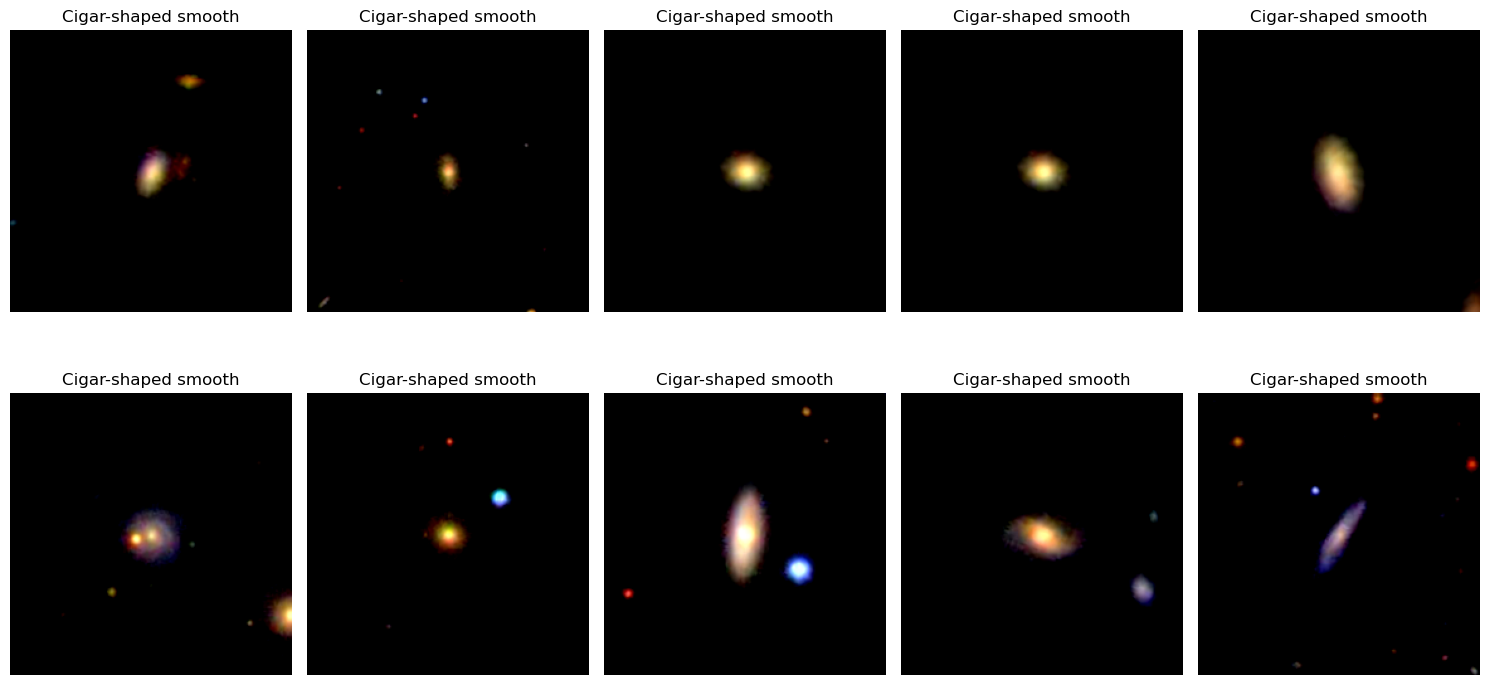

In [47]:
class_labels = ["Cigar-shaped smooth", "In between smooth", "completely round smooth", "edge-on", "spiral"]

dataiter = iter(train_loader)
images, labels = next(dataiter)

# Function to show images with labels
def imshow(img, label):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f"{class_labels[label]}")
    plt.axis("off")

# Subplot to display 10 images
plt.figure(figsize=(15, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    index = np.random.randint(0, len(images))
    imshow(torchvision.utils.make_grid(images[index]), labels[index].item())

plt.tight_layout()
plt.show()